In [1]:
cd \\new-monster\t\PreyCapture\ENRICHMENT_ALL\Enrichment_Cohort4

\\new-monster\t\PreyCapture\ENRICHMENT_ALL\Enrichment_Cohort4


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ssm

In [115]:
data = np.genfromtxt('compiled_preycapture.csv' ,delimiter=',')

condAll = data[:,-1].copy()

data_norm = data[:,0:3].copy()
data_norm[:,0] = data_norm[:,0]/180;
data_norm[:,1] = data_norm[:,1]/600
data_norm[:,2] = data_norm[:,2]/10;

#data_norm[data_norm[:,2]<0.04,2]=0.04;
#data_norm[:,1] = np.log(data_norm[:,1])
#data_norm[:,2] = np.log(data_norm[:,2])


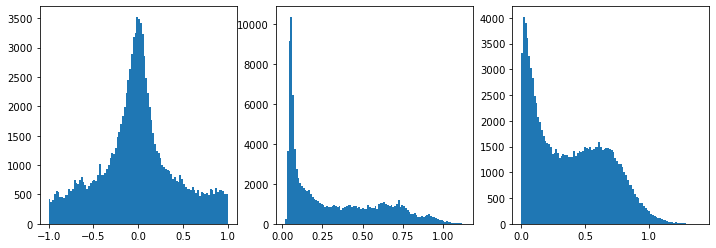

In [116]:
plt.figure(figsize = (12,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.hist(data_norm[:,i],100)
    

In [35]:
data.shape

(107891, 3)

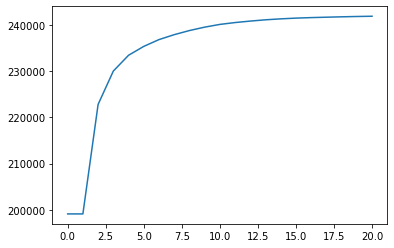

In [153]:
K = 6;
D = np.size(data_norm,1)
N_iters = 20
#test_hmm = ssm.HMM(K, D, observations="diagonal_gaussian")
test_hmm = ssm.HMM(K, D, observations="gaussian")


lls = test_hmm.fit(np.abs(data_norm), num_iters=N_iters,  init_method="kmeans")
zhat = test_hmm.most_likely_states(np.abs(data_norm))
plt.plot(lls)

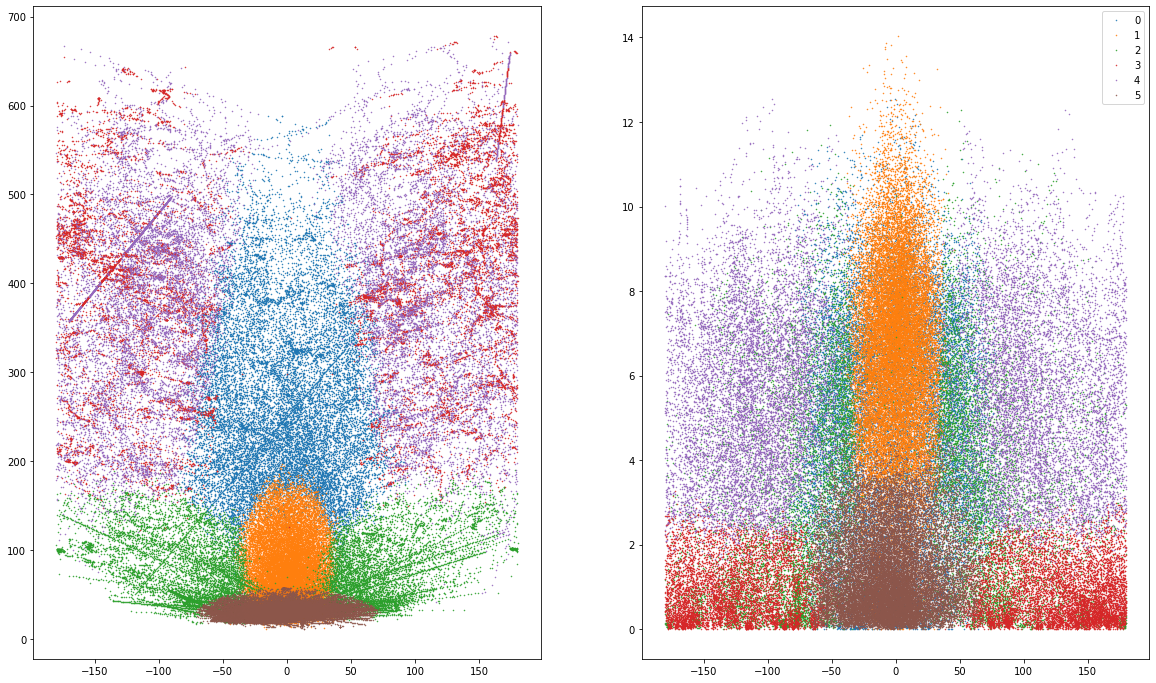

In [154]:
fig, axs = plt.subplots(1,2, figsize = (20,12))
for z in range(K):
    axs[0].plot(data[zhat==z,0],data[zhat==z,1],'.', markersize = 1,label = str(z))
    axs[1].plot(data[zhat==z,0],data[zhat==z,2],'.', markersize = 1, label = str(z))  
plt.legend()

In [130]:
b.shape

(21,)

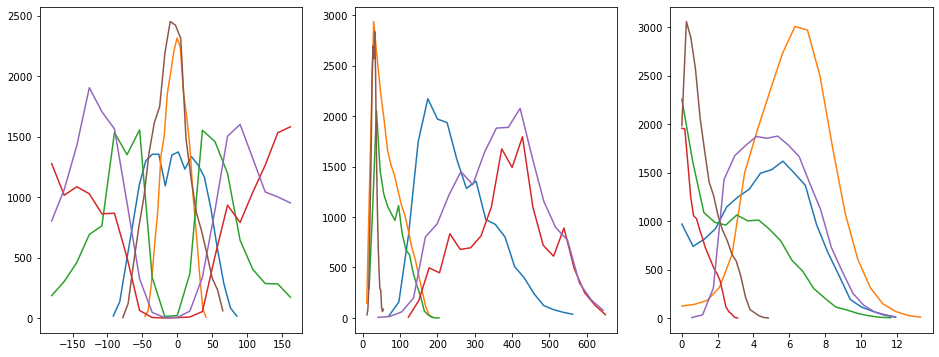

In [155]:
plt.figure(figsize = (16,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    for z in range(K):
        h,b = np.histogram(data[zhat==z,i],bins = 20)
        plt.plot(b[:-1],h)

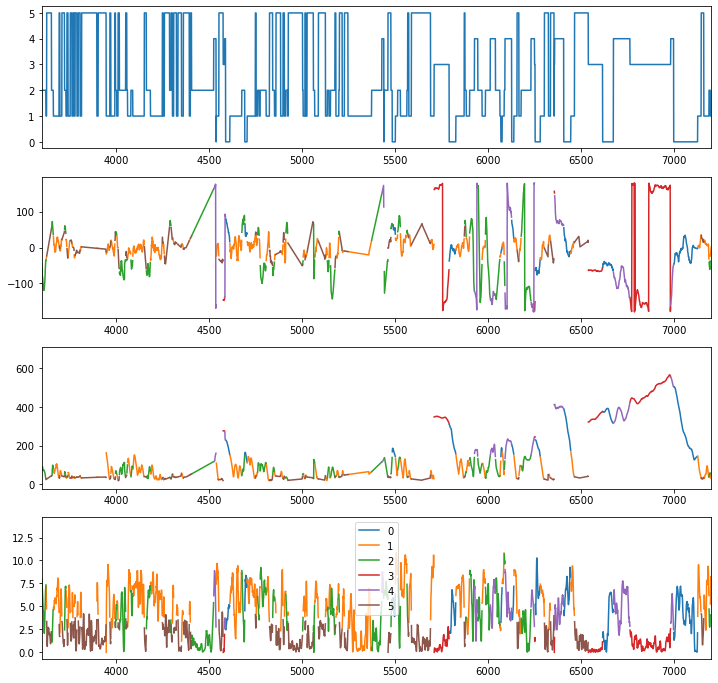

In [156]:
xrange = (60*60,60*120)
plt.figure(figsize = (12,12))
plt.subplot(4,1,1)
plt.plot(zhat);
plt.xlim(xrange)
for i in range(3):
    plt.subplot(4,1,i+2)
    for z in range(K):
        d = data[:,i].copy();
        d[zhat!=z] = np.nan;
        plt.plot(d, label = str(z))
        plt.xlim(xrange)
plt.legend()

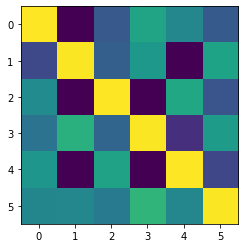

In [140]:
tm = test_hmm.transitions.transition_matrix
plt.imshow(np.log10(tm), vmin = -4, vmax = 0)

In [15]:
np.log(tm)

array([[-3.75688387e-02, -4.05694722e+00, -6.17310166e+00,
        -4.04912900e+00, -9.94822877e+00],
       [-5.16179110e+00, -5.20304240e-02, -5.44175233e+00,
        -3.39658561e+00, -4.94074219e+00],
       [-8.34698274e+01, -6.66951333e+00, -3.44862847e-02,
        -2.78836927e+01, -3.42254175e+00],
       [-3.49777940e+00, -4.20765013e+00, -5.83120975e+00,
        -5.01804413e-02, -7.05641114e+00],
       [-8.38419134e+01, -7.17717317e+00, -4.14298232e+00,
        -4.51256184e+00, -2.79978875e-02]])

In [16]:
meanT = np.zeros((K,2))
for z in range(K):
    for c in range(2):
        meanT[z,c] = (np.sum((zhat==z) & (condAll==c)))/np.sum(condAll==c)
meanT

array([[0.27229556, 0.18312352],
       [0.13299528, 0.15317407],
       [0.15730307, 0.16991178],
       [0.2320777 , 0.23315255],
       [0.2053284 , 0.26063807]])